In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.model_selection import train_test_split
from sklearn import set_config

from sklearn.pipeline import make_pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_validate, GridSearchCV

In [2]:
firm_performance = pd.read_csv('../outputs/Firm_Performance.csv')
firm_data = pd.read_csv('../inputs/Firm_data.csv')

In [3]:
BOD_df = pd.read_csv('../outputs/BOD_DF.csv')
CEO_df = pd.read_csv('../outputs/CEO_DF.csv')
BOD_df.columns = BOD_df.columns.str.lower()
CEO_df.columns = CEO_df.columns.str.lower()

In [4]:
firm_performance

,tic,fyear,roa,EBITDA_margin,NI_rev,roe,eps,chng_price,div_yield,vol,mva,tobinsQ,asset_g,revenue_g,ni_g,employee_g
0,AAL,2010,-0.018774,0.058773,-0.021245,0.119392,-1.412506,1.123689,0.000000,0.604973,6542.5755,1.260785,-0.013759,0.113119,-0.679155,-0.008238
1,AAL,2011,-0.082984,0.028932,-0.082383,0.278301,-5.902740,-0.523944,0.000000,0.642134,7228.3438,1.303101,-0.049426,0.083536,3.201699,0.023642
2,AAL,2012,-0.079796,0.057695,-0.075478,0.234882,-5.595123,1.498046,0.000000,0.572826,8253.5571,1.351066,-0.014173,0.034677,-0.052046,-0.029338
3,AAL,2013,-0.043380,0.110662,-0.068658,0.671549,-7.024963,0.772532,0.000000,0.362859,9322.9923,1.220516,0.798299,0.074713,-0.022388,0.419936
4,AAL,2014,0.065843,0.154396,0.067573,1.426027,4.132048,1.117107,0.003729,0.386805,35384.5843,1.808402,0.035314,0.596661,-2.571429,0.026268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,ALLE,2015,0.067343,0.214738,0.074416,6.011719,1.603275,0.217927,0.006068,0.203976,6302.1267,3.757680,0.133638,-0.023698,-0.121575,0.105882
4878,ALLE,2016,0.101940,0.218945,0.102368,2.022065,2.404643,-0.000967,0.007500,0.221979,5984.2360,3.662737,-0.016584,0.082153,0.488629,0.000000
4879,ALLE,2017,0.107514,0.235570,0.113487,0.680528,2.874966,0.239666,0.008044,0.173708,7161.5327,3.817283,0.131085,0.076050,0.192929,0.063830
4880,ALLE,2018,0.154758,0.226599,0.159205,0.668049,4.595454,-0.007339,0.010538,0.227619,6892.5153,3.452678,0.105507,0.134333,0.591292,0.100000


In [5]:
set_config(display="diagram")

performance_score = firm_performance
firm_performance = firm_performance.dropna(subset=['tobinsQ'])
# load data and split off X and y
y = firm_performance.tobinsQ
firm_performance = firm_performance.drop('tobinsQ',axis=1)

scores_df = firm_performance[['tic', 'fyear']].copy()

firm_performance = firm_performance.drop('fyear',axis=1)

In [6]:
# create test set for use later
rng = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(firm_performance, y, random_state=rng)

In [7]:
numer_pipe = make_pipeline(SimpleImputer(), 
                           StandardScaler())

preproc_pipe = ColumnTransformer(
    [ 
    # numerical vars
    ("num_impute", numer_pipe, make_column_selector(dtype_include=np.number)),
    ]
    , remainder = 'drop'
)

In [8]:
preproc_pipe

ColumnTransformer(transformers=[('num_impute',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7844f9a30>)])

In [9]:
linear_pipe = make_pipeline(preproc_pipe,
                           LinearRegression())

results = linear_pipe.fit(X_train, y_train)

In [10]:
y_test_predict = linear_pipe.predict(X_test)
test_score = r2_score(y_test,y_test_predict)
test_score

0.35508247038396556

In [11]:
coefficients = linear_pipe.named_steps['linearregression'].coef_
coefficients

array([ 0.88003787,  0.01125976, -0.41083001, -0.06905298, -0.1340844 ,
        0.30881491, -0.20964036,  0.20016876,  0.18311634, -0.04503854,
        0.11887712,  0.01627146,  0.17556182])

In [12]:
coef_df = pd.DataFrame({'metric':X_train.columns[1:],
                        'weight':coefficients})
coef_df

,metric,weight
0,roa,0.880038
1,EBITDA_margin,0.011260
2,NI_rev,-0.410830
3,roe,-0.069053
4,eps,-0.134084
5,chng_price,0.308815
6,div_yield,-0.209640
7,vol,0.200169
8,mva,0.183116
9,asset_g,-0.045039


In [13]:
weights = np.abs(coefficients) / np.sum(np.abs(coefficients))

In [14]:
weight_df = pd.DataFrame({'metric':X_train.columns[1:],
                        'weight':weights})
weight_df

,metric,weight
0,roa,0.318536
1,EBITDA_margin,0.004076
2,NI_rev,0.148703
3,roe,0.024994
4,eps,0.048533
5,chng_price,0.111778
6,div_yield,0.075881
7,vol,0.072453
8,mva,0.066280
9,asset_g,0.016302


[Text(0, 0, 'Return on Assets'),
 Text(1, 0, 'Net Income / Revenue'),
 Text(2, 0, 'Change in Stock Price'),
 Text(3, 0, 'Dividend Yield'),
 Text(4, 0, 'Stock Price Volatility'),
 Text(5, 0, 'Market Value Added'),
 Text(6, 0, 'Number of Employees Growth'),
 Text(7, 0, 'Earnings per Share'),
 Text(8, 0, 'Net Revenue Growth'),
 Text(9, 0, 'Return on Equity'),
 Text(10, 0, 'Asset Growth'),
 Text(11, 0, 'Net Income Growth'),
 Text(12, 0, 'EBITDA Margin')]

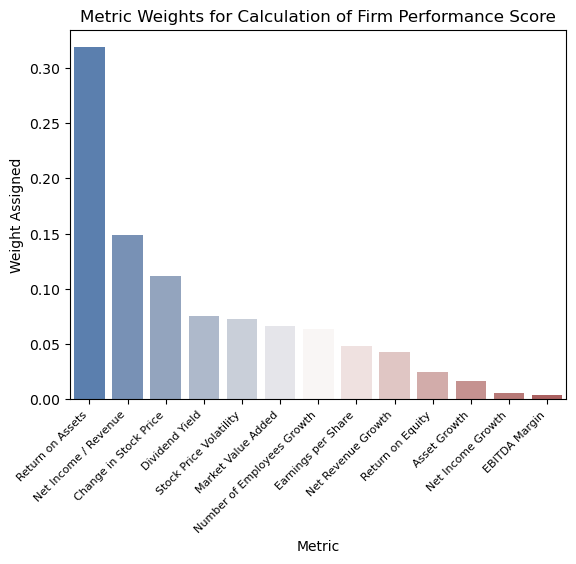

In [15]:
weight_named = weight_df.copy()
weight_named['metric'] = ['Return on Assets', 'EBITDA Margin', 'Net Income / Revenue', 'Return on Equity', 'Earnings per Share', 'Change in Stock Price',
                          'Dividend Yield', 'Stock Price Volatility', 'Market Value Added', 'Asset Growth', 'Net Revenue Growth', 'Net Income Growth',
                          'Number of Employees Growth']

weight_sorted = weight_named.sort_values(by='weight')[::-1]

fig, ax = plt.subplots()
sns.barplot(data = weight_sorted, x='metric', y='weight', palette="vlag")
ax.set(title='Metric Weights for Calculation of Firm Performance Score',
        xlabel = 'Metric',
        ylabel = 'Weight Assigned')
ax.tick_params(axis='x', rotation=45, labelsize=8)
ax.set_xticklabels(ax.get_xticklabels(), ha='right')

In [16]:
weight_dict = weight_df.set_index('metric').T.to_dict('list')

In [17]:
scaler = StandardScaler()
performance_score = pd.DataFrame(scaler.fit_transform(performance_score.iloc[:, 2:]), columns=performance_score.iloc[:, 2:].columns)

In [18]:
performance_score

,roa,EBITDA_margin,NI_rev,roe,eps,chng_price,div_yield,vol,mva,tobinsQ,asset_g,revenue_g,ni_g,employee_g
0,-1.064598,-0.779009,-0.588044,0.002450,-0.003444,3.043396,-0.655657,3.416618,-0.319913,-0.606562,-0.372228,0.054612,-0.069031,-0.369472
1,-1.900607,-0.909013,-0.870503,0.058396,-0.003869,-2.308221,-0.655657,3.784034,-0.307645,-0.582438,-0.472503,-0.032340,0.318936,-0.195798
2,-1.859098,-0.783708,-0.838602,0.043110,-0.003840,4.259332,-0.655657,3.098780,-0.289305,-0.555093,-0.373393,-0.175950,-0.006339,-0.484418
3,-1.384961,-0.552956,-0.807096,0.196843,-0.003976,1.902814,-0.655657,1.022835,-0.270173,-0.629519,1.910785,-0.058273,-0.003374,1.963075
4,0.037104,-0.362427,-0.177700,0.462465,-0.002919,3.022017,-0.523556,1.259588,0.196055,-0.294367,-0.234265,1.475852,-0.258201,-0.181493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,0.056644,-0.099547,-0.146086,2.076907,-0.003158,0.101424,-0.440713,-0.548050,-0.324215,0.816907,0.042161,-0.347527,-0.013290,0.252218
4878,0.507089,-0.081218,-0.016946,0.672307,-0.003082,-0.609559,-0.389986,-0.370056,-0.329902,0.762780,-0.380172,-0.036407,0.047712,-0.324593
4879,0.579659,-0.008793,0.034424,0.200004,-0.003038,0.172030,-0.370708,-0.847312,-0.308841,0.850886,0.034984,-0.054344,0.018151,0.023130
4880,1.194771,-0.047876,0.245642,0.195611,-0.002875,-0.630257,-0.282365,-0.314295,-0.313653,0.643026,-0.036924,0.116962,0.057975,0.220173


In [19]:
for metric in weight_dict:
    performance_score[metric] = performance_score[metric] * weight_dict[metric]

In [20]:
performance_score['Performance Score'] = performance_score.sum(axis=1)

In [21]:
performance_score

,roa,EBITDA_margin,NI_rev,roe,eps,chng_price,div_yield,vol,mva,tobinsQ,asset_g,revenue_g,ni_g,employee_g,Performance Score
0,-0.339113,-0.003175,-0.087444,0.000061,-0.000167,0.340184,-0.049752,0.247543,-0.021204,-0.606562,-0.006068,0.002350,-0.000407,-0.023478,-0.547231
1,-0.605412,-0.003705,-0.129447,0.001460,-0.000188,-0.258008,-0.049752,0.274163,-0.020391,-0.582438,-0.007703,-0.001392,0.001878,-0.012442,-1.393376
2,-0.592191,-0.003194,-0.124703,0.001077,-0.000186,0.476099,-0.049752,0.224515,-0.019175,-0.555093,-0.006087,-0.007571,-0.000037,-0.030783,-0.687080
3,-0.441160,-0.002254,-0.120018,0.004920,-0.000193,0.212693,-0.049752,0.074107,-0.017907,-0.629519,0.031150,-0.002507,-0.000020,0.124745,-0.815715
4,0.011819,-0.001477,-0.026425,0.011559,-0.000142,0.337795,-0.039728,0.091260,0.012995,-0.294367,-0.003819,0.063504,-0.001521,-0.011533,0.149920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,0.018043,-0.000406,-0.021723,0.051911,-0.000153,0.011337,-0.033442,-0.039708,-0.021489,0.816907,0.000687,-0.014954,-0.000078,0.016027,0.782960
4878,0.161526,-0.000331,-0.002520,0.016804,-0.000150,-0.068135,-0.029593,-0.026812,-0.021866,0.762780,-0.006198,-0.001567,0.000281,-0.020627,0.763595
4879,0.184642,-0.000036,0.005119,0.004999,-0.000147,0.019229,-0.028130,-0.061390,-0.020470,0.850886,0.000570,-0.002338,0.000107,0.001470,0.954511
4880,0.380578,-0.000195,0.036528,0.004889,-0.000140,-0.070449,-0.021426,-0.022771,-0.020789,0.643026,-0.000602,0.005033,0.000341,0.013991,0.948015


In [22]:
scores_df['Performance_Score'] = performance_score['Performance Score']

In [23]:
scores_df.drop_duplicates()
scores_df.describe()

,fyear,Performance_Score
count,4772.000000,4772.000000
mean,2014.512364,0.003891
std,2.888781,1.249283
min,2009.000000,-8.647737
25%,2012.000000,-0.763243
50%,2015.000000,-0.336189
75%,2017.000000,0.371746
max,2019.000000,11.409181


In [24]:
scores_df.query('Performance_Score >= 11')

,tic,fyear,Performance_Score
4485,DXCM,2014,11.409181


In [25]:
small_bod_df = pd.read_csv('../3_regressions/Saved_dfs/small_bod_df.csv')
small_ceo_df = pd.read_csv('../3_regressions/Saved_dfs/small_ceo_df.csv')
med_bod_df = pd.read_csv('../3_regressions/Saved_dfs/medium_bod_df.csv')
med_ceo_df = pd.read_csv('../3_regressions/Saved_dfs/medium_ceo_df.csv')
large_bod_df = pd.read_csv('../3_regressions/Saved_dfs/large_bod_df.csv')
large_ceo_df = pd.read_csv('../3_regressions/Saved_dfs/large_ceo_df.csv')

pred_small_bod_df = pd.read_csv('../3_regressions/Saved_dfs/pred_small_bod.csv')
pred_small_ceo_df = pd.read_csv('../3_regressions/Saved_dfs/pred_small_ceo.csv')
pred_med_bod_df = pd.read_csv('../3_regressions/Saved_dfs/pred_med_bod.csv')
pred_med_ceo_df = pd.read_csv('../3_regressions/Saved_dfs/pred_med_ceo.csv')
pred_large_bod_df = pd.read_csv('../3_regressions/Saved_dfs/pred_large_bod.csv')
pred_large_ceo_df = pd.read_csv('../3_regressions/Saved_dfs/pred_large_ceo.csv')

In [26]:
data_frames = [small_bod_df, small_ceo_df, med_bod_df, med_ceo_df, large_bod_df, large_ceo_df, pred_small_bod_df, pred_small_ceo_df, pred_med_bod_df, pred_med_ceo_df, 
               pred_large_bod_df, pred_large_ceo_df]

for df in data_frames:
    df.columns = df.columns.str.lower()

In [27]:
small_bod_df['prediction'] = pred_small_bod_df['prediction']
med_bod_df['prediction'] = pred_med_bod_df['prediction']
large_bod_df['prediction'] = pred_large_bod_df['prediction']

small_ceo_df['prediction'] = pred_small_ceo_df['prediction']
med_ceo_df['prediction'] = pred_med_ceo_df['prediction']
large_ceo_df['prediction'] = pred_large_ceo_df['prediction']

In [28]:
small_bod_df['over_under_comp'] = small_bod_df['total_director_comp']/pred_small_bod_df['prediction']
med_bod_df['over_under_comp'] = med_bod_df['total_director_comp']/pred_med_bod_df['prediction']
large_bod_df['over_under_comp'] = large_bod_df['total_director_comp']/pred_large_bod_df['prediction']

small_bod_df = small_bod_df.drop_duplicates()
med_bod_df = med_bod_df.drop_duplicates()
large_bod_df = large_bod_df.drop_duplicates()

small_ceo_df['over_under_comp'] = small_ceo_df['tdc1']/pred_small_ceo_df['prediction']
med_ceo_df['over_under_comp'] = med_ceo_df['tdc1']/pred_med_ceo_df['prediction']
large_ceo_df['over_under_comp'] = large_ceo_df['tdc1']/pred_large_ceo_df['prediction']

small_ceo_df = small_ceo_df.drop_duplicates()
med_ceo_df = med_ceo_df.drop_duplicates()
large_ceo_df = large_ceo_df.drop_duplicates()

In [29]:
BOD_key = BOD_df[['ticker','year','signature_index']]
CEO_key = CEO_df[['ticker','year','signature_index']]

BOD_key = BOD_key.drop_duplicates()
CEO_key = CEO_key.drop_duplicates()

In [30]:
small_bod_df.columns

Index(['signature_index', 'total_director_comp', 'prediction',
       'over_under_comp'],
      dtype='object')

In [31]:
BOD_small_merged = small_bod_df.merge(BOD_key, 
                how='left',
                on='signature_index',
                indicator=False,
                validate='1:1')
BOD_med_merged = med_bod_df.merge(BOD_key, 
                how='left',
                on='signature_index',
                indicator=False,
                validate='1:1')
BOD_large_merged = large_bod_df.merge(BOD_key, 
                how='left',
                on='signature_index',
                indicator=False,
                validate='1:1')

CEO_small_merged = small_ceo_df.merge(CEO_key, 
                how='left',
                on='signature_index',
                indicator=False,
                validate='m:1')
CEO_med_merged = med_ceo_df.merge(CEO_key, 
                how='left',
                on='signature_index',
                indicator=False,
                validate='m:1')
CEO_large_merged = large_ceo_df.merge(CEO_key, 
                how='left',
                on='signature_index',
                indicator=False,
                validate='m:1')

In [32]:
BOD_small = BOD_small_merged[['ticker', 'year', 'over_under_comp']]
BOD_small = BOD_small.rename(columns={'ticker':'tic','year':'fyear'})
BOD_small = BOD_small.merge(scores_df,
                how='left',
                on=['tic','fyear'],
                indicator=False,
                validate='m:1')

BOD_med = BOD_med_merged[['ticker', 'year', 'over_under_comp']]
BOD_med = BOD_med.rename(columns={'ticker':'tic','year':'fyear'})
BOD_med = BOD_med.merge(scores_df,
                how='left',
                on=['tic','fyear'],
                indicator=False,
                validate='m:1')

BOD_large = BOD_large_merged[['ticker', 'year', 'over_under_comp']]
BOD_large = BOD_large.rename(columns={'ticker':'tic','year':'fyear'})
BOD_large = BOD_large.merge(scores_df,
                how='left',
                on=['tic','fyear'],
                indicator=False,
                validate='m:1')

BOD_small = BOD_small.drop_duplicates()
BOD_med = BOD_med.drop_duplicates()
BOD_large = BOD_large.drop_duplicates()

In [33]:
CEO_small = CEO_small_merged[['ticker', 'year', 'over_under_comp']]
CEO_small = CEO_small.rename(columns={'ticker':'tic','year':'fyear'})
CEO_small = CEO_small.merge(scores_df,
                how='left',
                on=['tic','fyear'],
                indicator=False,
                validate='m:1')

CEO_med = CEO_med_merged[['ticker', 'year', 'over_under_comp']]
CEO_med = CEO_med.rename(columns={'ticker':'tic','year':'fyear'})
CEO_med = CEO_med.merge(scores_df,
                how='left',
                on=['tic','fyear'],
                indicator=False,
                validate='m:1')

CEO_large = CEO_large_merged[['ticker', 'year', 'over_under_comp']]
CEO_large = CEO_large.rename(columns={'ticker':'tic','year':'fyear'})
CEO_large = CEO_large.merge(scores_df,
                how='left',
                on=['tic','fyear'],
                indicator=False,
                validate='m:1')

CEO_small = CEO_small.drop_duplicates()
CEO_med = CEO_med.drop_duplicates()
CEO_large = CEO_large.drop_duplicates()

In [34]:
BOD_small_corr = BOD_small['over_under_comp'].corr(BOD_small['Performance_Score'])
BOD_med_corr = BOD_med['over_under_comp'].corr(BOD_med['Performance_Score'])
BOD_large_corr = BOD_large['over_under_comp'].corr(BOD_large['Performance_Score'])

BOD_correlations = pd.DataFrame({'Firm Size':['Small', 'Medium', 'Large'],
                        'Correlation':[BOD_small_corr, BOD_med_corr, BOD_large_corr]})

print('Correlation between BOD payment and firm performance:\n')
print(BOD_correlations)

Correlation between BOD payment and firm performance:

  Firm Size  Correlation
0     Small    -0.270183
1    Medium    -0.047808
2     Large    -0.027891


In [35]:
CEO_small_corr = CEO_small['over_under_comp'].corr(CEO_small['Performance_Score'])
CEO_med_corr = CEO_med['over_under_comp'].corr(CEO_med['Performance_Score'])
CEO_large_corr = CEO_large['over_under_comp'].corr(CEO_large['Performance_Score'])

CEO_correlations = pd.DataFrame({'Firm Size':['Small', 'Medium', 'Large'],
                        'Correlation':[CEO_small_corr, CEO_med_corr, CEO_large_corr]})

print('Correlation between CEO payment and firm performance:\n')
print(CEO_correlations)

Correlation between CEO payment and firm performance:

  Firm Size  Correlation
0     Small     0.241048
1    Medium     0.050954
2     Large     0.042286


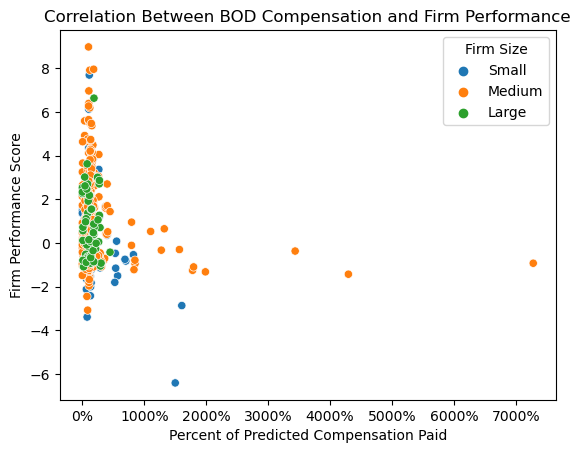

In [36]:
BOD_small['Firm Size'] = 'Small'
BOD_med['Firm Size'] = 'Medium'
BOD_large['Firm Size'] = 'Large'
BOD_combined = pd.concat([BOD_small, BOD_med, BOD_large], axis=0)

fig, ax = plt.subplots()
sns.scatterplot(data=BOD_combined,
                x='over_under_comp',
                y='Performance_Score',
                hue='Firm Size',
                ax=ax)
ax.set(title='Correlation Between BOD Compensation and Firm Performance',
    xlabel='Percent of Predicted Compensation Paid',
    ylabel='Firm Performance Score'
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.savefig('images/BOD_corr.png')

In [37]:
CEO_large.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tic                64 non-null     object 
 1   fyear              64 non-null     int64  
 2   over_under_comp    64 non-null     float64
 3   Performance_Score  64 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


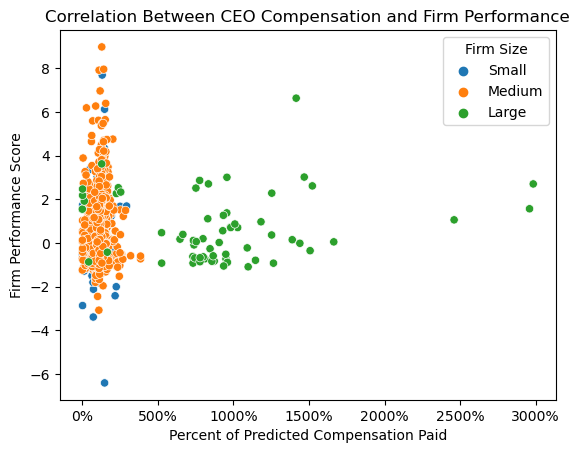

In [38]:
CEO_small['Firm Size'] = 'Small'
CEO_med['Firm Size'] = 'Medium'
CEO_large['Firm Size'] = 'Large'
CEO_combined = pd.concat([CEO_small, CEO_med, CEO_large], axis=0)

fig, ax = plt.subplots()
sns.scatterplot(data = CEO_combined,
            x='over_under_comp',
            y='Performance_Score',
            hue='Firm Size',
            ax=ax)

ax.set(title='Correlation Between CEO Compensation and Firm Performance',
        xlabel = 'Percent of Predicted Compensation Paid',
        ylabel = 'Firm Performance Score')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.savefig('images/CEO_corr.png')

In [39]:
BOD_small.drop_duplicates()

,tic,fyear,over_under_comp,Performance_Score,Firm Size
0,PNW,2017,0.971666,-0.868265,Small
1,PNW,2018,0.971073,-0.854748,Small
2,AMD,2017,1.170119,0.550340,Small
3,ALK,2017,0.799081,-0.374199,Small
4,ALK,2018,0.879162,-0.817516,Small
...,...,...,...,...,...
205,ENPH,2019,1.029338,4.342328,Small
206,EPAM,2017,0.000000,1.478708,Small
207,EPAM,2018,0.000000,1.367565,Small
208,ALLE,2017,0.751501,0.954511,Small


In [40]:
CEO_small.drop_duplicates()

,tic,fyear,over_under_comp,Performance_Score,Firm Size
0,PNW,2017,0.846479,-0.868265,Small
1,PNW,2018,1.003415,-0.854748,Small
2,AMD,2017,1.040336,0.550340,Small
3,ALK,2017,1.262817,-0.374199,Small
4,ALK,2018,1.231049,-0.817516,Small
...,...,...,...,...,...
205,ENPH,2019,1.453374,4.342328,Small
206,EPAM,2017,1.102779,1.478708,Small
207,EPAM,2018,1.223123,1.367565,Small
208,ALLE,2017,1.171257,0.954511,Small


In [41]:
BOD_small = BOD_small.rename(columns={'over_under_comp':'over_under_bod'})
CEO_small = CEO_small.rename(columns={'over_under_comp':'over_under_ceo'})

small_bod_ceo = pd.merge(BOD_small, CEO_small, 
                         on=['tic','fyear'],
                         how='left',
                         validate='1:m')
small_bod_ceo = small_bod_ceo[['tic','fyear','over_under_ceo','over_under_bod','Performance_Score_x','Firm Size_x']].rename(columns={'Performance_Score_x':'Performance_Score',
                                                                                                                                    'Firm Size_x':'Firm Size'})

BOD_med = BOD_med.rename(columns={'over_under_comp':'over_under_bod'})
CEO_med = CEO_med.rename(columns={'over_under_comp':'over_under_ceo'})

med_bod_ceo = pd.merge(BOD_med, CEO_med, 
                         on=['tic','fyear'],
                         how='left',
                         validate='1:m')
med_bod_ceo = med_bod_ceo[['tic','fyear','over_under_ceo','over_under_bod','Performance_Score_x','Firm Size_x']].rename(columns={'Performance_Score_x':'Performance_Score',
                                                                                                                                'Firm Size_x':'Firm Size'})

BOD_large = BOD_large.rename(columns={'over_under_comp':'over_under_bod'})
CEO_large = CEO_large.rename(columns={'over_under_comp':'over_under_ceo'})

large_bod_ceo = pd.merge(BOD_large, CEO_large, 
                         on=['tic','fyear'],
                         how='left',
                         validate='1:m')
large_bod_ceo = large_bod_ceo[['tic','fyear','over_under_ceo','over_under_bod','Performance_Score_x','Firm Size_x']].rename(columns={'Performance_Score_x':'Performance_Score',
                                                                                                                                    'Firm Size_x':'Firm Size'})

In [42]:
def assignCase(df):
    df = df.dropna()
    cases = [
        (df['over_under_ceo'] >= 1) & (df['over_under_bod'] >= 1), # Case 1
        (df['over_under_ceo'] >= 1) & (df['over_under_bod'] <= 1), # Case 2
        (df['over_under_ceo'] <= 1) & (df['over_under_bod'] >= 1), # Case 3
        (df['over_under_ceo'] <= 1) & (df['over_under_bod'] <= 1) # Case 4
    ]
    names = ['Case 1', 'Case 2', 'Case 3', 'Case 4']
    df['Case'] = np.select(cases, names, default = np.nan)
    return df

In [43]:
combined_bod_ceo = pd.concat([small_bod_ceo, med_bod_ceo, large_bod_ceo], axis=0)
combined_bod_ceo = assignCase(combined_bod_ceo)
combined_bod_ceo

/var/folders/h9/dl1xgx0x2jv7mqj5_8snyz600000gs/T/ipykernel_5864/2760364371.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Case'] = np.select(cases, names, default = np.nan)


,tic,fyear,over_under_ceo,over_under_bod,Performance_Score,Firm Size,Case
0,PNW,2017,0.846479,0.971666,-0.868265,Small,Case 4
1,PNW,2018,1.003415,0.971073,-0.854748,Small,Case 2
2,AMD,2017,1.040336,1.170119,0.550340,Small,Case 1
3,ALK,2017,1.262817,0.799081,-0.374199,Small,Case 2
4,ALK,2018,1.231049,0.879162,-0.817516,Small,Case 2
...,...,...,...,...,...,...,...
59,META,2017,1.281969,0.780203,3.619390,Large,Case 2
60,META,2018,0.018079,1.148694,2.178396,Large,Case 3
61,META,2019,0.014864,0.715410,2.468653,Large,Case 4
62,V,2018,15.221392,0.432545,2.611944,Large,Case 2


In [44]:
case_desc = pd.DataFrame({'Case':['Case 1','Case 2','Case 3', 'Case 4'],
                        'Description':['CEO and BOD both overpaid',
                                       'CEO overpaid and BOD underpaid',
                                       'CEO underpaid and BOD overpaid',
                                       'CEO and BOD both underpaid']})
case_desc

,Case,Description
0,Case 1,CEO and BOD both overpaid
1,Case 2,CEO overpaid and BOD underpaid
2,Case 3,CEO underpaid and BOD overpaid
3,Case 4,CEO and BOD both underpaid


In [45]:
combined_avg_perf = combined_bod_ceo.groupby(['Firm Size', 'Case']).agg({'Performance_Score': 'mean', 'Case': 'size'})
combined_avg_perf = combined_avg_perf.rename(columns={'Performance_Score':'avg_perf_score','Case':'count'})
combined_avg_perf

avg_perf_score  count
Firm Size Case                         
Large     Case 1        0.520715     31
          Case 2        0.748627     27
          Case 3        1.755433      3
          Case 4        1.173222      3
Medium    Case 1        0.307451    591
          Case 2        0.163192    151
          Case 3        0.023725    229
          Case 4        0.063110    122
Small     Case 1        0.221959     77
          Case 2       -0.054820     53
          Case 3       -0.450574     50
          Case 4       -0.425460     30